In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
dataset = pd.read_csv('predictive_maintenance.csv')

In [6]:
dataset.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
dataset.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


--------DATA ANALYSIS------

In [9]:
dataset.corr()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


In [ ]:
sns.pairplot(dataset, hue='Target', diag_kind='kde')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#we'll drop product id since it doesn't has any effect
dataset.drop(columns=['Product ID'],inplace = True)

In [98]:
dataset.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [99]:
#text to number
dataset.Type.replace({'L':0,'M':1,'H':2},inplace = True)

In [100]:
# Select the columns you want to normalize
columns_to_normalize = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']

# Apply min-max scaling to the selected columns
scaler = MinMaxScaler()
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

In [101]:
dataset.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,0.5,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,No Failure
1,2,0.0,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,No Failure
2,3,0.0,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,No Failure
3,4,0.0,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,No Failure
4,5,0.0,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,No Failure


In [102]:
dataset['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [227]:
from sklearn.utils import resample

# Separate the majority class ("No Failure") from the other classes
no_failure = dataset[dataset['Failure Type'] == 'No Failure']
other_failures = dataset[dataset['Failure Type'] != 'No Failure']

# Determine the number of samples you want to keep for the majority class
desired_sample_size = len(other_failures)

# Undersample the "No Failure" class
undersampled_no_failure = resample(no_failure, replace=False, n_samples=desired_sample_size*5, random_state=42)

# Combine the undersampled "No Failure" class with the other classes
undersampled_data = pd.concat([undersampled_no_failure, other_failures])

# Shuffle the data to randomize the order
fin_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [228]:
fin_data.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,595,1.0,0.250000,0.481481,0.064028,0.640110,0.007905,0.0,No Failure
1,1187,0.0,0.217391,0.333333,0.144936,0.604396,0.122530,0.0,No Failure
2,982,0.0,0.097826,0.135802,0.283469,0.375000,0.537549,0.0,No Failure
3,287,0.0,0.315217,0.320988,0.245052,0.403846,0.371542,0.0,No Failure
4,4152,0.5,0.717391,0.580247,0.119325,0.607143,0.288538,1.0,Heat Dissipation Failure


In [229]:
fin_data['Failure Type'].value_counts()

No Failure                  1740
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [230]:
failure_type_mapping = {
    'No Failure': 0,
    'Heat Dissipation Failure': 1,
    'Power Failure': 2,
    'Overstrain Failure': 3,
    'Tool Wear Failure': 4,
    'Random Failures': 5
}


In [231]:
# Replace the values in the "Failure Type" column with the numeric values
fin_data['Failure Type'] =fin_data['Failure Type'].replace(failure_type_mapping)

In [232]:
x = fin_data.drop(columns = ['Target','Failure Type'])
y1 = fin_data['Target']  #To predict just failure
y2 = fin_data['Failure Type']  #To predict type of failure
y2.head()

0    0
1    0
2    0
3    0
4    1
Name: Failure Type, dtype: int64

In [233]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size = 0.2,random_state = 2)

In [234]:
from sklearn.svm import SVC

Predicting Failure

In [235]:
model1 = SVC()
model1.fit(x_train,y_train)

SVC()

In [236]:
y1_new = model1.predict(x_test)

In [237]:
err2 = accuracy_score(y1_new,y_test)
err2

0.8444976076555024

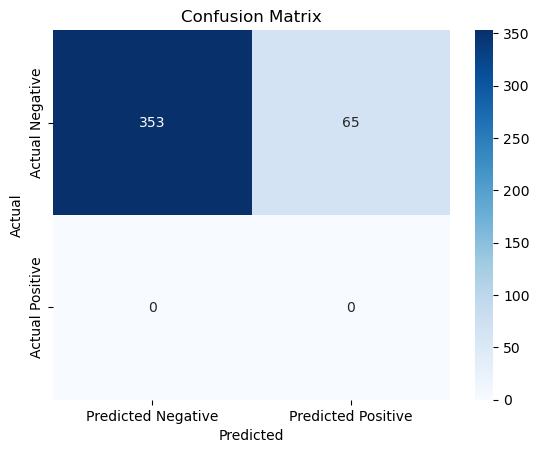

In [238]:
conf_matrix = confusion_matrix(y1_new, y_test)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predicting type of failures

In [239]:
x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size = 0.2,random_state = 2)

In [240]:
model1.fit(x_train,y_train)

SVC()

In [255]:
y2_new = model1.predict(x_train)

In [259]:
err2 = accuracy_score(y2_new,y_train)
err2

0.8335329341317366